### Read eqd Files with Numpy and Plot

In [1]:
# import all the necessary modules
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
# https://freeqdsk.readthedocs.io/en/stable/geqdsk.html
from freeqdsk import geqdsk
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# read the ./eqds/circ_mtm_07_09.eqd file as a text file, selecting only the first 3 columns
filename = "./geqdsks/ITER_10MA.geqdsk"

In [3]:
with open(filename, "r") as f:
    data = geqdsk.read(f)

In [4]:
data

{'comment': '    KIAM  SPIDER                                ',
 'int': 3,
 'nx': 256,
 'ny': 257,
 'rdim': 7.2,
 'zdim': 12.0,
 'rcentr': 6.2,
 'rleft': 2.5,
 'zmid': 0.0,
 'rmagx': 6.56016557,
 'zmagx': 0.573374091,
 'simagx': 10.5536758,
 'sibdry': 1.54752129,
 'bcentr': 5.3,
 'cpasma': 10000000.0,
 'fpol': array([32.6526922, 32.6456423, 32.6546783, 32.6637757, 32.66997  ,
        32.6729703, 32.673231 , 32.6716062, 32.6687631, 32.6649955,
        32.6606382, 32.6560975, 32.6516596, 32.6475523, 32.6439618,
        32.6410695, 32.6390423, 32.6380124, 32.6378161, 32.6381774,
        32.638931 , 32.6399297, 32.6410868, 32.6423264, 32.6436007,
        32.6448676, 32.6460888, 32.647235 , 32.6482818, 32.6492086,
        32.6500146, 32.6506989, 32.6512619, 32.6517044, 32.6520269,
        32.6522246, 32.6522927, 32.652229 , 32.6520281, 32.6516865,
        32.6512113, 32.6506129, 32.6498945, 32.6490616, 32.6481201,
        32.6470707, 32.6459263, 32.6446997, 32.6433915, 32.6420106,
        3

In [5]:
data.keys()

dict_keys(['comment', 'int', 'nx', 'ny', 'rdim', 'zdim', 'rcentr', 'rleft', 'zmid', 'rmagx', 'zmagx', 'simagx', 'sibdry', 'bcentr', 'cpasma', 'fpol', 'pres', 'ffprime', 'pprime', 'psi', 'qpsi', 'nbdry', 'nlim', 'rbdry', 'zbdry', 'rlim', 'zlim'])

In [6]:
# len of data['psi']
psi = data['psi']
print(psi.shape)
type(psi)

(256, 257)


numpy.ndarray

>The 2D grid is instead expressed on a linearly spaced grid extending the range [rleft, rleft + rdim] in the R direction and [zmid - zdim/2, zmid + zdim/2] in the Z direction.

In [7]:
# create a meshgrid to plot the psi values
x = np.linspace(data['rleft'], data['rleft'] + data['rdim'], data['nx'])
y = np.linspace(data['zmid'] - data['zdim'] / 2, data['zmid'] + data['zdim'] / 2, data['ny'])
xx, yy = np.meshgrid(x, y)

In [8]:
# rotate the psi matrix by 90 degrees to match the plot
psi = np.rot90(psi)

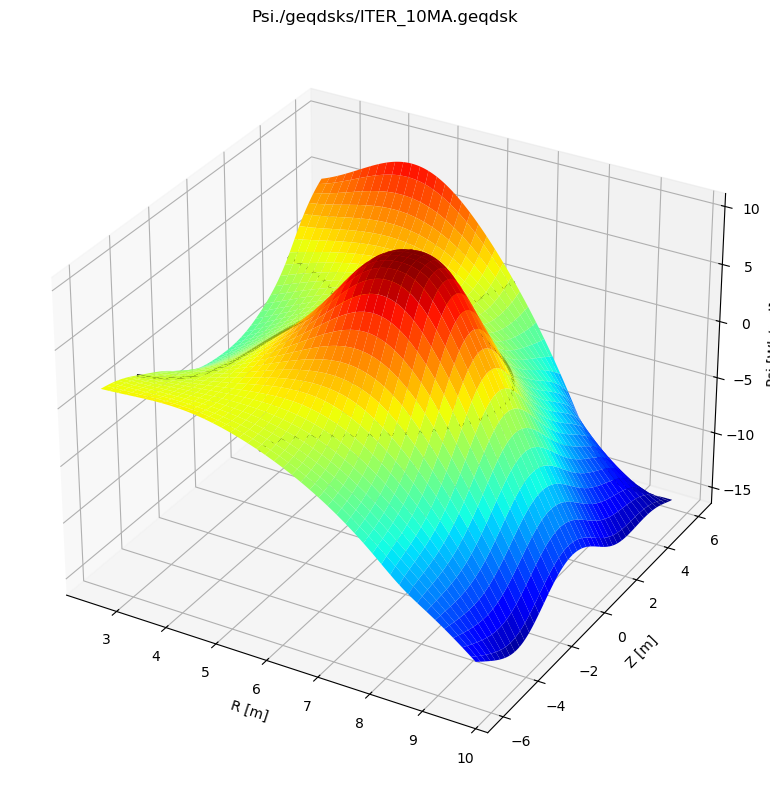

In [19]:
# plot the psi values
# create a figure
fig = plt.figure()
# set figure size
fig.set_size_inches(8, 8)

# create an axis 3D
ax = fig.add_subplot(111, projection='3d')
# plot the surface
ax.plot_surface(xx, yy, psi, cmap='jet')
# add x, y, z labels
ax.set_xlabel('R [m]')
ax.set_ylabel('Z [m]')
ax.set_zlabel('Psi [Wb/rad]')
# add a title
ax.set_title('Psi'+filename)

# add a contour plot at psi = 0
plt.contour(xx, yy, psi, levels=[0], colors='black')

plt.tight_layout()
plt.show()